In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns; sns.set()
import numpy as np
from matplotlib import pyplot as plt
from scattermap import scattermap

In [2]:
df_1 = pd.read_csv('./out/pvalues.txt', sep='\t', index_col='interacting_pair')
df_1.head()

,id_cp_interaction,partner_a,partner_b,gene_a,gene_b,secreted,receptor_a,receptor_b,annotation_strategy,is_integrin,CA|CA
interacting_pair,,,,,,,,,,,
KLRG2_WNT11,CPI-SS0A7B487D4,simple:A4D1S0,simple:O96014,ENSG00000188883,ENSG00000085741,True,True,False,InnateDB-All,False,1.0
KLRG2_TNFSF9,CPI-SS0FEC87269,simple:A4D1S0,simple:P41273,ENSG00000188883,ENSG00000125657,True,True,False,InnateDB-All,False,1.0
PVR_TNFSF9,CPI-SS00A8596B5,simple:P15151,simple:P41273,ENSG00000073008,ENSG00000125657,True,True,False,InnateDB-All,False,1.0
KLRG2_WNT5B,CPI-SS044DF8749,simple:A4D1S0,simple:Q9H1J7,ENSG00000188883,ENSG00000111186,True,True,False,InnateDB-All,False,1.0
GALR2_GAL,CPI-SS0F8ABC300,simple:O43603,simple:P22466,ENSG00000182687,ENSG00000069482,True,True,False,guidetopharmacology.org,False,1.0


In [3]:
df_1.columns.tolist()

['id_cp_interaction',
 'partner_a',
 'partner_b',
 'gene_a',
 'gene_b',
 'secreted',
 'receptor_a',
 'receptor_b',
 'annotation_strategy',
 'is_integrin',
 'CA|CA']

In [4]:
df_2=df_1[['secreted',  'CA|CA']]
df_2.head()

,secreted,CA|CA
interacting_pair,,
KLRG2_WNT11,True,1.0
KLRG2_TNFSF9,True,1.0
PVR_TNFSF9,True,1.0
KLRG2_WNT5B,True,1.0
GALR2_GAL,True,1.0


In [5]:
df_3 = df_2[(df_2['secreted']==True) & (df_2['CA|CA']<0.00001)]
df_3

,secreted,CA|CA
interacting_pair,,
FN1_a3b1 complex,True,0.0
FN1_aVb1 complex,True,0.0
LGALS9_CD44,True,0.0
TGFB1_aVb6 complex,True,0.0
LAMP1_FAM3C,True,0.0
CXADR_FAM3C,True,0.0
EGFR_TGFB1,True,0.0
EGFR_MIF,True,0.0
CD74_MIF,True,0.0


In [6]:
df_3.columns.tolist()

['secreted', 'CA|CA']

In [7]:
df_4 = df_3[[ 'CA|CA']]
df_4

,CA|CA
interacting_pair,
FN1_a3b1 complex,0.0
FN1_aVb1 complex,0.0
LGALS9_CD44,0.0
TGFB1_aVb6 complex,0.0
LAMP1_FAM3C,0.0
CXADR_FAM3C,0.0
EGFR_TGFB1,0.0
EGFR_MIF,0.0
CD74_MIF,0.0


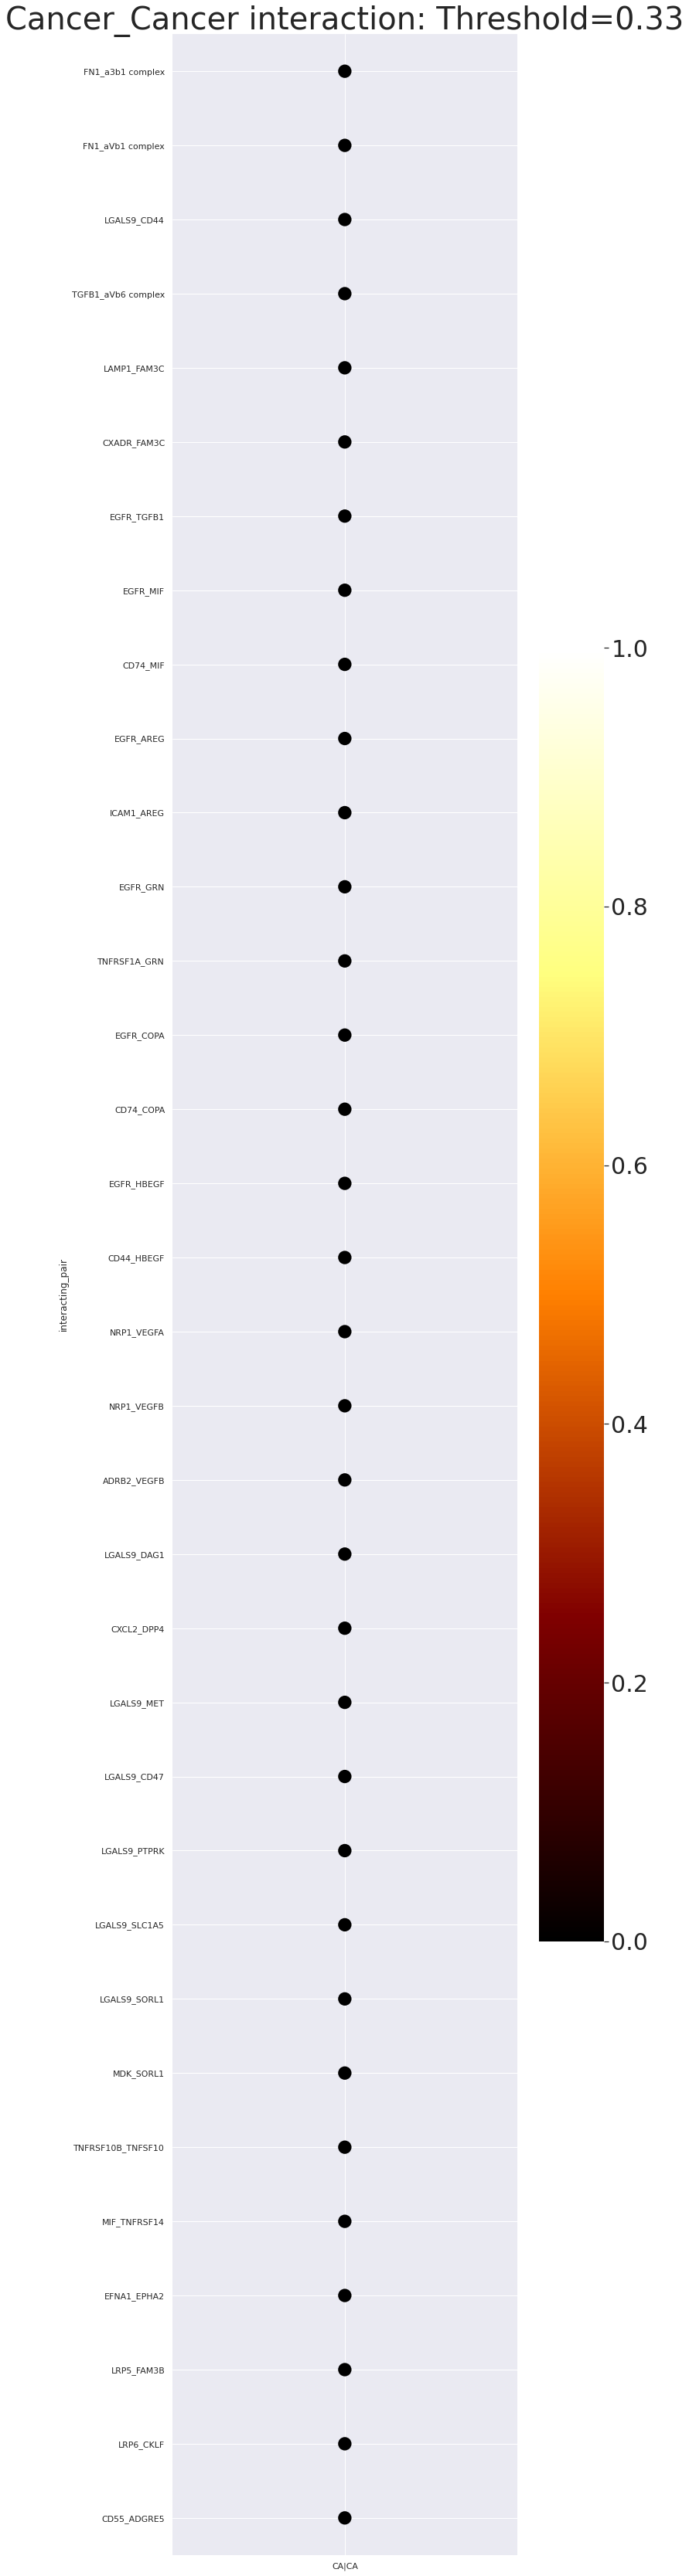

In [8]:
fig, ax = plt.subplots(figsize=(10, 60))

plt.title("Cancer_Cancer interaction: Threshold=0.33", size=40)
plt.rc('xtick', labelsize=30) # fontsize of the tick labels 
plt.rc('ytick', labelsize=30) # fontsize of the tick labels 
plt.rc('legend', fontsize=40)

ax=scattermap(df_4, marker_size=300, vmin=0, vmax=1, cmap='afmhot') #cmap=plt.cm.RdYlGn
plt.savefig("CA_CA.jpeg",dpi=600)

In [ ]:
scattermap?